# Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

import random

In [2]:
sys.path.append('..')
import advanced.unsupervised.ppca as ppca

# Simulate data

Simulate some data: $I=1024$ samples with $J=5$ variables, governed by $K=2$ principal components. Add isotropic Gaussian noise. 

In [3]:

np.random.seed(42)
I = 1000
J = 5
K =2

mu = np.ones(J)
W = np.array([[+1,+1,+1,+1,0],[0,+1,+1,0,+1]]).T
sigma_epsilon = .0001 # noise variance

X = np.random.randn(I,K)
Y = np.matmul(X, W.T)+mu

E = np.random.randn(I,J)*np.sqrt(sigma_epsilon)

Ytil = Y+E

# Show non-noisy variances and observed eigenvalues

Show the expected values for the eigenvalues ($\Lambda$) and non-noisy variances, equal to the deflated eigenvalues  ($\Phi$).

C:\ProgramData\Anaconda3_1\envs\ATK\lib\site-packages\matplotlib\transforms.py:796: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


<BarContainer object of 5 artists>

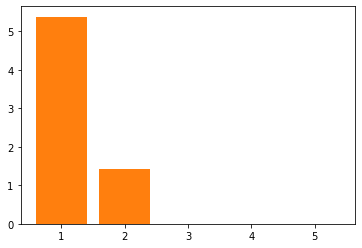

In [4]:
Yc = Y-np.mean(Y)
Ytilc = Ytil-np.mean(Ytil)
Phi = np.flipud(np.sort(np.linalg.eigvals(np.matmul(Yc.T, Yc)/I)))
Lambda = np.flipud(np.sort(np.linalg.eigvals(np.matmul(Ytilc.T, Ytilc)/I)))

fix, ax = plt.subplots(nrows=1, ncols=1)
ax.bar(np.arange(0,J)+1,Lambda)
ax.bar(np.arange(0,J)+1,Phi)


# Define PPCA model hyperparameters

In [5]:
Center='mean'
Scale='no'

# PPCA model selection via cross-validation

Execute leave-one-out cross-validation:

In [6]:
ignorance_cv = ppca.crossvalidate(Ytil,Center=Center,Scale=Scale)


Display results: 

* Top panel: cumulative fraction of variance as function of retained number of PCs. Yellow indicates selected model.

* Bottom panel: cross-validated ignorance score. Yellow indicates selected model.

<BarContainer object of 1 artists>

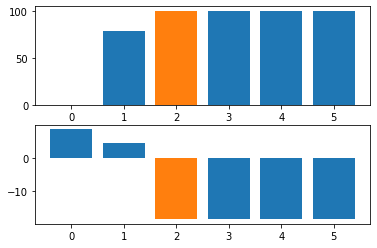

In [7]:
Khat = np.argmin(ignorance_cv)

fix, ax = plt.subplots(nrows=2, ncols=1)
ax[0].bar(np.arange(0,len(Lambda)+1),np.append(0,np.cumsum(Lambda)/np.sum(Lambda))*100)
ax[0].bar(Khat,np.sum(Lambda[:Khat])/np.sum(Lambda)*100)

ax[1].bar(np.arange(0,len(ignorance_cv)),ignorance_cv)
ax[1].bar(Khat,ignorance_cv[Khat])


# Apply selected PPCA model 

Display the first two principal scores, i.e. the values for the first two components and use colour to visualize the ignorance score, which is equivalent to the squared Mahalanobis distance to the mean in the original $J=5$-dimensional space. 

In [8]:
center, scale, P, Lambda, Scores = ppca.decompose(Ytil,Center,Scale)
center, scale, P, LambdaK, sigma_noiseK = ppca.build(center, scale, P, Lambda, Khat, I, J)
dist2, ign, scores = ppca.test(Ytil,center, scale, P, LambdaK)

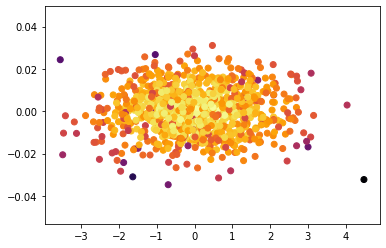

In [9]:
fix, ax = plt.subplots(nrows=1, ncols=1)
ax.scatter(scores[:,1],scores[:,2],c=ign,cmap='inferno_r')